# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url).json()
btc_value = response_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
# YOUR CODE HERE!
response_eth = requests.get(eth_url).json()
eth_value = response_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41271.60
The current value of your 5.3 ETH is $10430.88


In [6]:
### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [12]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-06-21", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
portfolio_data = alpaca.get_barset(tickers, timeframe, start=today, limit=1000).df
# Preview DataFrame
# YOUR CODE HERE!
portfolio_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966  416.80   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846  420.85   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(portfolio_data["AGG"]["close"][0])
spy_close_price = float(portfolio_data["SPY"]["close"][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.96
Current SPY closing price: $420.85


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_agg * agg_close_price
my_agg_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22992.00
The current value of your 200 AGG shares is $21042.50


### Savings Health Analysis

In [17]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
data = [
    my_btc_value + my_eth_value,
    my_agg_value + my_spy_value,
]
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(data, columns=["amount"], index =["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,51702.477
shares,44034.500


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

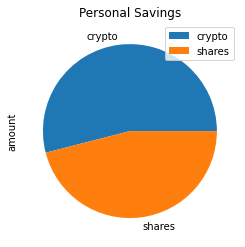

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Personal Savings")

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
totalsavings = float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE!
if emergency_fund < totalsavings:
    print(f"Congrats! You have enough money in your emergency fund.")
elif emergency_fund == totalsavings:
    print(f"Congrats! You've reached your financial goal.")
else:
    print(f"You are ${(emergency_fund - totalsavings):0.2f} away from your goal.")

Congrats! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-21', tz='America/New_York').isoformat()

In [26]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2017-06-30 00:00:00-04:00  109.62  109.6273  109.46  109.49  2201175  242.26   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.01  109.08  1681516  242.91   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.00  109.15  2694196  242.62   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.82  108.95  2057393  241.88   
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.87  2536724  241.21   

                                                              
                             high      low   close    volume  
time                                                          
2017-06-30 00:00:00-04:00  242.71  241.575  241.77  50347309  
2017-07-03 00:00:00-04:00  243.38  242.290  242.32  27234078  
2017-07-05 00:00:00-04:00  243.01  241.700  242.77  41067682  
2017-07-06 00:00:00-04:00  242.03  240.340  240.58  52390161  
2017-07-07 00:00:00-04:00  242.28  241.020  242.10  36831437

In [27]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC30_return = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [28]:
# Printing the simulation input data
# YOUR CODE HERE!
MC30_return.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.46  109.49  2201175   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.01  109.08  1681516   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.00  109.15  2694196   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.82  108.95  2057393   
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.87  2536724   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-30 00:00:00-04:00          NaN  242.26  242.71  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.38  242.290  242.32   
2017-07-05 00:00:00-04:00     0.000642  242.62  243.01  241.700  242.77   
2017-07-06 00:00:00-04:00    -0.001832  241.88  242.03  240.340  240.58   
2017-07-07 00:00:00-04:00    -0.000734  241.21  242.28  241.020  242.10   

                                                  
                             volume daily_return  
time                                              
2017-06-30 00:00:00-04:00  50347309          NaN  
2017-07-03 00:00:00-04:00  27234078     0.002275  
2017-07-05 00:00:00-04:00  41067682     0.001857  
2017-07-06 00:00:00-04:00  52390161    -0.009021  
2017-07-07 00:00:00-04:00  36831437     0.006318

In [29]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC30_return.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000121,0.996817,1.001948,0.995861,0.999160,0.994966,1.000138,0.992759,1.000186,1.001926,...,0.995330,1.004547,1.006602,0.996343,1.013677,1.000073,1.018162,1.009679,1.011301,1.005305
2,1.001721,1.005504,0.993168,0.997772,0.993966,0.989170,1.008972,0.984388,1.002245,1.015919,...,0.988095,0.993209,1.004067,0.994792,1.004626,1.007100,1.002787,0.996681,1.004517,1.007673
3,0.998329,1.017200,0.990028,0.991018,0.985034,0.987421,1.017439,1.000048,0.997917,1.022382,...,0.983370,0.989961,1.016026,0.994226,1.002357,1.023858,0.994346,1.000927,1.003661,1.009563
4,0.974377,0.999306,0.993956,0.976764,0.982301,0.992099,1.016711,0.996873,0.998946,1.003641,...,0.991195,0.989553,1.030185,1.004254,0.994588,1.034802,1.002541,0.993734,1.003295,1.003127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.949623,11.372301,68.678705,10.288908,23.231232,23.423815,26.417834,35.116262,4.831389,8.155980,...,9.734619,14.321398,15.600456,42.753340,4.444266,9.771759,12.698837,42.879111,8.835486,3.977372
7557,13.922064,11.364097,68.556802,10.350442,23.543400,23.613379,26.689367,35.086213,4.824371,8.235629,...,9.808436,14.375615,15.689803,42.610632,4.413206,9.685875,12.771939,43.319931,8.826752,3.976844
7558,13.690474,11.305022,68.234242,10.489972,23.452874,23.751990,26.807200,35.160075,4.879672,8.217822,...,9.813771,14.433039,15.654507,42.892200,4.415856,9.732623,12.650151,43.671487,8.880082,3.970923
7559,13.711019,11.367553,68.541166,10.448111,23.282703,23.875586,26.572235,35.049789,4.864506,8.121831,...,9.782896,14.321184,15.771775,43.078827,4.382662,9.732614,12.529115,43.655273,8.872505,4.003598


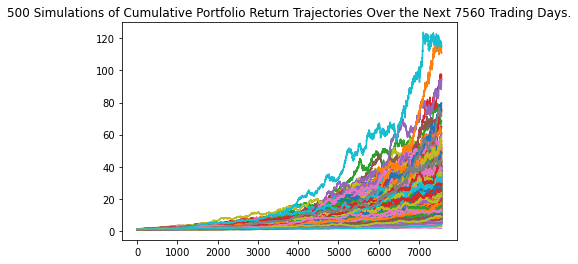

In [30]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC30_return_plot = MC30_return.plot_simulation()

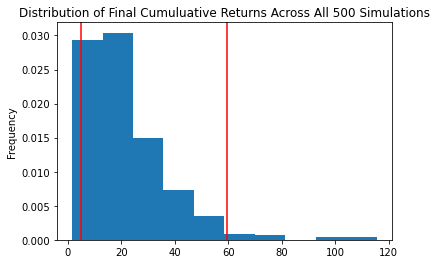

In [31]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC30_dist_plot = MC30_return.plot_distribution()

### Retirement Analysis

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC30_return.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean             21.902822
std              15.463757
min               1.651337
25%              11.293125
50%              17.733724
75%              29.001895
max             115.449479
95% CI Lower      4.916966
95% CI Upper     59.596768
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [33]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*20000,2)
ci_upper = round(summary[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98339.33 and $1191935.36


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [34]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*30000,2)
ci_upper = round(summary[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $147508.99 and $1787903.04


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
five_year_forcast = MCSimulation(portfolio_data = df_stock_data, weights = [.80, .20], num_simulation = 500, num_trading_days = 252*5)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
five_year_forcast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001132,1.000682,0.997334,0.999796,0.999031,0.996254,1.007229,1.003781,0.998024,0.996641,...,0.996731,1.001985,1.004724,1.006686,1.003914,0.996811,0.993813,1.002556,0.995420,1.001134
2,1.007942,1.003194,0.999735,0.999412,0.997951,0.995783,1.003917,1.005353,1.001769,0.991103,...,1.006215,1.001980,1.004341,1.005909,1.004568,1.000961,0.996040,0.999351,0.998954,0.998779
3,1.010559,1.003586,1.005688,0.998295,0.997966,1.000067,0.995275,1.002985,0.996616,0.993394,...,1.013270,1.003913,1.001914,1.001227,1.004701,0.998157,0.994559,1.004228,0.995249,1.002823
4,1.015599,1.001166,1.006137,0.997938,1.001158,0.999036,0.993634,1.003269,1.000444,0.990595,...,1.006965,1.000066,1.004609,1.001953,1.005073,0.992157,1.000188,1.004907,0.998233,1.003159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.212798,0.892164,1.332365,1.064652,1.290364,1.185856,1.032610,1.235259,1.052711,1.218349,...,1.363125,1.497827,1.488499,1.436995,1.418764,1.171676,1.548134,1.387570,1.300123,1.081076
1257,1.218654,0.890889,1.330495,1.065009,1.293363,1.178252,1.035817,1.233990,1.052445,1.224334,...,1.360219,1.494409,1.488005,1.436152,1.414192,1.169583,1.551976,1.388882,1.296794,1.083094
1258,1.224729,0.889298,1.334684,1.066335,1.299870,1.174390,1.039197,1.234219,1.057491,1.228600,...,1.362326,1.497111,1.488220,1.434854,1.411561,1.174283,1.548737,1.389508,1.286409,1.084486
1259,1.226123,0.887284,1.336036,1.069151,1.299939,1.174149,1.038131,1.230165,1.061873,1.234731,...,1.367510,1.506406,1.484311,1.435407,1.410032,1.176888,1.554474,1.382109,1.290061,1.090164


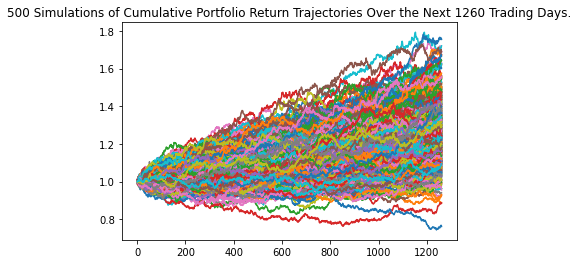

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
forcast_line_plot = five_year_forcast.plot_simulation()

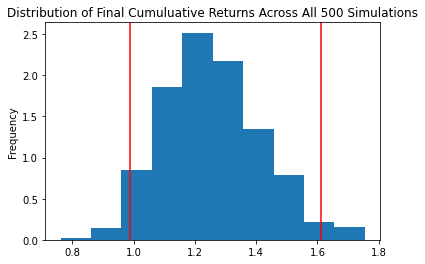

In [38]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC5_dist_plot = five_year_forcast.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_five = five_year_forcast.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_five)

count           500.000000
mean              1.255783
std               0.159502
min               0.761623
25%               1.142429
50%               1.244535
75%               1.356726
max               1.754609
95% CI Lower      0.988246
95% CI Upper      1.611800
Name: 1260, dtype: float64


In [40]:
# Set initial investment
# YOUR CODE HERE!
int_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five =round(summary_five[8]*60000,2)
ci_upper_five =round(summary_five[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $59294.73 and $96708.03


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC10_return = MCSimulation(portfolio_data = df_stock_data, weights = [.80, .20], num_simulation = 500, num_trading_days = 252*10)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC10_return.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999633,1.000659,1.006479,1.004580,0.997278,0.995145,0.998890,1.006266,1.001122,1.000390,...,1.004490,0.999709,0.995141,1.002727,0.997142,0.995549,1.003563,1.001289,0.996781,1.003436
2,0.997900,0.999803,1.007811,1.001982,0.999780,0.998452,0.998304,1.015580,1.005872,0.997667,...,1.009623,1.002484,0.997265,1.001481,0.995865,0.994498,1.010385,0.999438,0.995794,1.003521
3,0.991636,1.001060,1.007334,1.001256,1.006938,1.004566,0.995023,1.013301,1.011088,0.995306,...,1.011631,1.004508,0.995432,1.005110,0.998270,0.998589,1.014481,0.996299,0.996782,1.006186
4,0.989857,0.994361,1.000263,1.004756,1.011258,1.010855,1.001186,1.011932,1.013285,0.992090,...,1.016798,1.002678,0.996876,1.010346,1.004188,0.999382,1.014982,0.997462,0.997278,1.010971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.770712,1.684581,1.641057,2.140360,1.719086,1.520457,1.942569,1.634414,1.210969,1.577596,...,1.629538,1.458815,2.195636,1.157589,1.296078,1.743552,1.370242,1.257445,2.154986,1.606722
2517,1.783297,1.682346,1.642152,2.146427,1.719144,1.524750,1.945626,1.636702,1.204224,1.582627,...,1.621449,1.452888,2.208917,1.161848,1.301076,1.743300,1.375641,1.259668,2.161971,1.622184
2518,1.786174,1.688100,1.641024,2.153310,1.729864,1.534860,1.935403,1.649192,1.205388,1.582875,...,1.614174,1.452147,2.187532,1.155679,1.295481,1.747330,1.374553,1.256917,2.161031,1.610898
2519,1.775423,1.682043,1.645277,2.150243,1.734200,1.540640,1.942992,1.652299,1.199547,1.582830,...,1.613839,1.450330,2.188524,1.157999,1.286533,1.741359,1.370379,1.256768,2.161753,1.609837


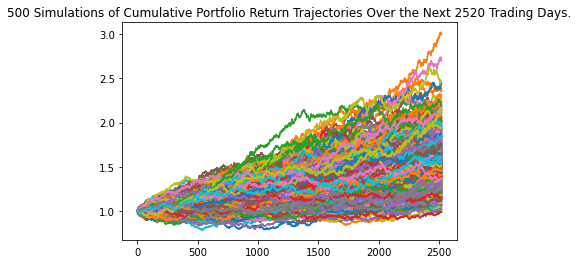

In [43]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC10_plot= MC10_return.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

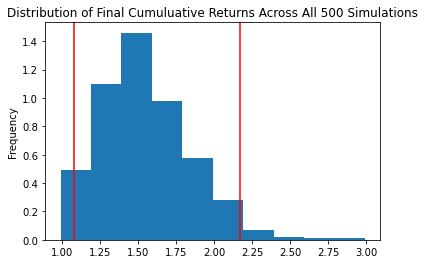

In [44]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC10_return.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_ten = MC10_return.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(summary_ten)

count           500.000000
mean              1.549569
std               0.294976
min               0.991605
25%               1.330501
50%               1.522266
75%               1.711196
max               2.991695
95% CI Lower      1.077754
95% CI Upper      2.171544
Name: 2520, dtype: float64


In [46]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary_ten[8]*60000,2)
ci_upper_ten = round(summary_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64665.24 and $130292.65
